In [2]:
# This will be my Weather API 
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests 
import random
import time
from scipy.stats import linregress

# Import API key
from config import (api_key, gkey)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [3]:
# Create Dataframe with the Columns needed, then populate Lat and Lng columns
location_data = pd.DataFrame(columns =['Lat', 'Lng', 'City', 'Country', 'Temperature', 
                                       'Humidity', 'Clouds', 'Windspeed', 'Latitude', 'Longitude'])
lat = []
lng = []
for x in range(1, 1500):
    lat.append(random.uniform(-90, 90)) 
    lng.append(random.uniform (-180, 180))
location_data['Lat'] = lat
location_data['Lng'] = lng
location_data

,Lat,Lng,City,Country,Temperature,Humidity,Clouds,Windspeed,Latitude,Longitude
0,45.741412,87.186359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-25.466360,50.415358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23.053245,166.387189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-71.851613,109.612264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.975330,-63.510137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-13.931427,-77.595177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-89.247436,-3.988903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-42.920961,32.235273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-14.219325,-143.385181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-29.944920,124.269087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Find City and Country from citipy based on Lat and Lng data and populate data frame
Cities = []
Country = []
for index, row in location_data.iterrows():
    city=citipy.nearest_city(row['Lat'], row['Lng'])
    country=citipy.nearest_city(row['Lat'], row['Lng'])
    Cities.append(city.city_name)
    Country.append(country.country_code)
location_data['City']=Cities
location_data['Country']=Country
location_data.head()

,Lat,Lng,City,Country,Temperature,Humidity,Clouds,Windspeed,Latitude,Longitude
0,45.741412,87.186359,changji,cn,NaN,NaN,NaN,NaN,NaN,NaN
1,-25.466360,50.415358,taolanaro,mg,NaN,NaN,NaN,NaN,NaN,NaN
2,23.053245,166.387189,butaritari,ki,NaN,NaN,NaN,NaN,NaN,NaN
3,-71.851613,109.612264,albany,au,NaN,NaN,NaN,NaN,NaN,NaN
4,1.975330,-63.510137,santa isabel do rio negro,br,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Make sure the datset has no duplicate values
location_data = location_data.drop_duplicates(['City', 'Country'])
len(location_data['City'].value_counts())

606

In [6]:
# Review Data
location_data

,Lat,Lng,City,Country,Temperature,Humidity,Clouds,Windspeed,Latitude,Longitude
0,45.741412,87.186359,changji,cn,NaN,NaN,NaN,NaN,NaN,NaN
1,-25.466360,50.415358,taolanaro,mg,NaN,NaN,NaN,NaN,NaN,NaN
2,23.053245,166.387189,butaritari,ki,NaN,NaN,NaN,NaN,NaN,NaN
3,-71.851613,109.612264,albany,au,NaN,NaN,NaN,NaN,NaN,NaN
4,1.975330,-63.510137,santa isabel do rio negro,br,NaN,NaN,NaN,NaN,NaN,NaN
5,-13.931427,-77.595177,pisco,pe,NaN,NaN,NaN,NaN,NaN,NaN
6,-89.247436,-3.988903,hermanus,za,NaN,NaN,NaN,NaN,NaN,NaN
7,-42.920961,32.235273,port alfred,za,NaN,NaN,NaN,NaN,NaN,NaN
8,-14.219325,-143.385181,atuona,pf,NaN,NaN,NaN,NaN,NaN,NaN
9,-29.944920,124.269087,esperance,au,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Iterate over each row

cols = ['Temperature', 'Humidity', 'Windspeed', 'Clouds', 'Latitude', 'Longitude']

for index, row in location_data.iterrows():
    city = row['City']
    country = row['Country']
    print(f"Processing Record {index + 1} | {city}")
    city = city.replace(" ", "&")
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=" + city + "," + country + "&APPID=" + api_key
    print(url)
    weather = requests.get(url).json()
    if 'message' in weather.keys():
        location_data.loc[index, cols] = 'City not found'
    else:
        location_data.loc[index, 'Temperature'] = weather['main']['temp']
        location_data.loc[index, 'Humidity'] = weather['main']['humidity']
        location_data.loc[index, 'Windspeed'] = weather['wind']['speed']
        location_data.loc[index, 'Clouds'] = weather['clouds']['all']
        location_data.loc[index, 'Latitude'] = weather['coord']['lat']
        location_data.loc[index, 'Longitude'] = weather['coord']['lon']
      
    time.sleep(.50)
    
print("----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Processing Record 1 | changji
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=changji,cn&APPID=ceabcfc59b2da0606aa171dc8607a1cf


C:\Users\jehix\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Processing Record 2 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=taolanaro,mg&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 3 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=butaritari,ki&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 4 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=albany,au&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 5 | santa isabel do rio negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=santa&isabel&do&rio&negro,br&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 6 | pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=pisco,pe&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 7 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=hermanus,za&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 8 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperia

Processing Record 65 | alice springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=alice&springs,au&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 66 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=saint-philippe,re&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 67 | bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=bubaque,gw&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 70 | barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=barentsburg,sj&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 72 | baton rouge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=baton&rouge,us&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 73 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=bambous&virieux,mu&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 74 | tumannyy
http://api.openweathermap.org/data/2.5/w

Processing Record 156 | ozgon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ozgon,kg&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 158 | bulgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=bulgan,mn&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 160 | manono
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=manono,cd&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 161 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=cape&town,za&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 162 | ulverstone
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ulverstone,au&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 163 | sept-iles
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=sept-iles,ca&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 164 | springbok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=springbok,za&APPID=c

Processing Record 264 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ilulissat,gl&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 267 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=bethel,us&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 269 | grand river south east
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=grand&river&south&east,mu&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 271 | poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=poum,nc&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 272 | rawson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=rawson,ar&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 274 | port lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=port&lincoln,au&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 276 | sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperia

Processing Record 374 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=dikson,ru&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 376 | tezu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=tezu,in&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 377 | uinskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=uinskoye,ru&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 380 | grand gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=grand&gaube,mu&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 382 | belmonte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=belmonte,br&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 383 | niigata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=niigata,jp&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 385 | margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=margate,za&APPID=ceabcfc

Processing Record 488 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=nikolskoye,ru&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 490 | yago
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=yago,mx&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 492 | rock sound
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=rock&sound,bs&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 495 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=komsomolskiy,ru&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 498 | ucluelet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ucluelet,ca&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 500 | berlin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=berlin,us&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 505 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=mar&de

Processing Record 633 | seoul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=seoul,kr&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 635 | tura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=tura,ru&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 637 | belgrade
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=belgrade,us&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 642 | turtas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=turtas,ru&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 645 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=vila&franca&do&campo,pt&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 646 | maple creek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=maple&creek,ca&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 653 | sorland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=sorl

Processing Record 801 | acajutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=acajutla,sv&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 804 | jonuta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=jonuta,mx&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 808 | mount gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=mount&gambier,au&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 812 | inverell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=inverell,au&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 817 | kununurra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=kununurra,au&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 821 | sampit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=sampit,id&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 822 | chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=chapais,ca&A

Processing Record 977 | port hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=port&hardy,ca&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 982 | rocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=rocha,uy&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 983 | great yarmouth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=great&yarmouth,gb&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 988 | chekhov
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=chekhov,ru&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 991 | atasu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=atasu,kz&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 994 | yeppoon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=yeppoon,au&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 995 | baishishan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=baishishan,cn

Processing Record 1135 | puerto quijarro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=puerto&quijarro,bo&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 1139 | imeni poliny osipenko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=imeni&poliny&osipenko,ru&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 1144 | sringeri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=sringeri,in&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 1155 | sistranda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=sistranda,no&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 1159 | joutseno
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=joutseno,fi&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 1160 | lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=lata,sb&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 1164 | parry sound
http://api.openweathermap.org/data/

Processing Record 1302 | okakarara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=okakarara,na&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 1305 | adwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=adwa,et&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 1306 | amahai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=amahai,id&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 1310 | ust-kuyga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=ust-kuyga,ru&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 1312 | aksay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=aksay,kz&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 1314 | sechura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=sechura,pe&APPID=ceabcfc59b2da0606aa171dc8607a1cf
Processing Record 1317 | hebi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=hebi,cn&APPID=ceabcfc59b2da0

In [8]:
# Check dataframe
location_data

,Lat,Lng,City,Country,Temperature,Humidity,Clouds,Windspeed,Latitude,Longitude
0,45.741412,87.186359,changji,cn,68.57,92,7,3.78,32.07,116.17
1,-25.466360,50.415358,taolanaro,mg,City not found,City not found,City not found,City not found,City not found,City not found
2,23.053245,166.387189,butaritari,ki,85.68,62,100,10.56,3.07,172.79
3,-71.851613,109.612264,albany,au,55.4,93,90,5.82,-35.02,117.88
4,1.975330,-63.510137,santa isabel do rio negro,br,82.64,74,84,4.03,17.49,120.43
5,-13.931427,-77.595177,pisco,pe,67.75,30,0,18.34,-13.71,-76.2
6,-89.247436,-3.988903,hermanus,za,60.01,74,100,5.01,-34.42,19.24
7,-42.920961,32.235273,port alfred,za,69.14,72,71,1.79,-7.04,29.76
8,-14.219325,-143.385181,atuona,pf,79.33,78,22,15.48,-9.8,-139.03
9,-29.944920,124.269087,esperance,au,53.6,100,90,5.82,-33.86,121.89


In [9]:
# Drop cities that were not found from dataframe
location_data = location_data[location_data.Temperature!= 'City not found']

In [10]:
# Make Sure cites were dropped
location_data

,Lat,Lng,City,Country,Temperature,Humidity,Clouds,Windspeed,Latitude,Longitude
0,45.741412,87.186359,changji,cn,68.57,92,7,3.78,32.07,116.17
2,23.053245,166.387189,butaritari,ki,85.68,62,100,10.56,3.07,172.79
3,-71.851613,109.612264,albany,au,55.4,93,90,5.82,-35.02,117.88
4,1.975330,-63.510137,santa isabel do rio negro,br,82.64,74,84,4.03,17.49,120.43
5,-13.931427,-77.595177,pisco,pe,67.75,30,0,18.34,-13.71,-76.2
6,-89.247436,-3.988903,hermanus,za,60.01,74,100,5.01,-34.42,19.24
7,-42.920961,32.235273,port alfred,za,69.14,72,71,1.79,-7.04,29.76
8,-14.219325,-143.385181,atuona,pf,79.33,78,22,15.48,-9.8,-139.03
9,-29.944920,124.269087,esperance,au,53.6,100,90,5.82,-33.86,121.89
10,23.204213,131.115915,nishihara,jp,70.88,72,40,3.36,35.74,139.53


In [11]:
# Export file as a CSV  with the header
location_data.to_csv("Output/Weather_Data_API.csv", index=False, header=True)

In [12]:
# Dispaly count ot make sure you have over 500
location_data.count()

Lat            527
Lng            527
City           527
Country        527
Temperature    527
Humidity       527
Clouds         527
Windspeed      527
Latitude       527
Longitude      527
dtype: int64

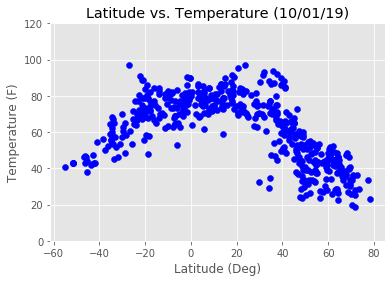

In [13]:
# Get todays date to display in charts 
date = time.strftime("(%m/%d/%y)")

# Scatter Plot for Temperature (F) vs. Latitude
plt.style.use('ggplot')
fig, ax = plt.subplots()

# Set Y limit for clarity
plt.ylim(0, 120)

# Create Scatterplot
Temp_Lat_Scatter = ax.scatter(
location_data["Latitude"],
location_data["Temperature"],
color="blue"
)

# Add Labels and Title
ax.set_xlabel("Latitude (Deg)")
ax.set_ylabel("Temperature (F)")
ax.set_title(f"Latitude vs. Temperature {date}")

# Save fig to file
plt.savefig('Output/Lat vs Temp.png')

# Show
plt.show()

In [14]:
# As expected the Tempature rises the nearer you get to the Equator forming almost a bell curve.
# It does also show a propensity for populations to gather in the Northern Hemisphere.
# The code is just plotting at the relationship between Latitude and Temperature as it nears the equator.

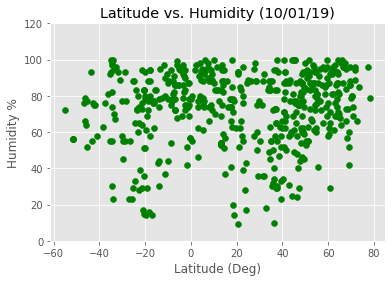

In [15]:
# Scatter Plot for Humidity % vs. Latitude
plt.style.use('ggplot')
fig, ax = plt.subplots()

# Set Y Limit to 110 for clarity
plt.ylim(0, 120)

# Create Scatter plot
Temp_Lat_Scatter = ax.scatter(
location_data["Latitude"],
location_data["Humidity"],
color="green"
)

# Add Labels and Title
ax.set_xlabel("Latitude (Deg)")
ax.set_ylabel("Humidity %")
ax.set_title(f"Latitude vs. Humidity {date}")

# Save fig to file
plt.savefig('Output/Lat vs Humidity.png')

# Show
plt.show()

In [16]:
# Humidity seems to gather in the 55-95 range for most cities with latitude being of no little influence expect in 
# high population latutides.
# The code is just plotting the relationship between Latitude and Humidity as it nears the equator.

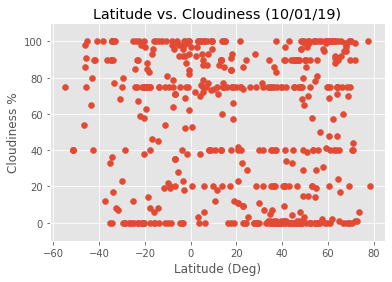

In [17]:
# Scatter Plot for Cloudiness % vs. Latitude
plt.style.use('ggplot')
fig, ax = plt.subplots()

# Set Y Limit to 110 for clarity
plt.ylim(-10, 110)

# Create scatterplot 
Temp_Lat_Scatter = ax.scatter(
location_data["Latitude"],
location_data["Clouds"]
)

# Add Labels and Title
ax.set_xlabel("Latitude (Deg)")
ax.set_ylabel("Cloudiness %")
ax.set_title(f"Latitude vs. Cloudiness {date}")

# Save fig to file
plt.savefig('Output/Lat vs Cloudiness.png')

#Show
plt.show()

In [18]:
# It seems the clouds gather in bands with  the largest number around zero's, would do further review. The largest groupings are
# at approximately 78% and 100%.
# The code is just plotting the relationship between Latitude and Cloudiness as it nears the equator.

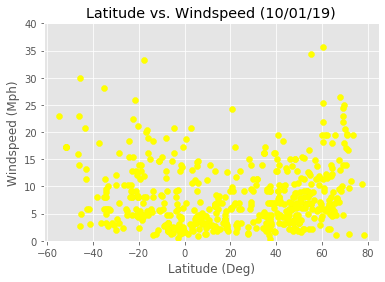

In [19]:
# Scatter Plot for Windspeed (Mph) vs. Latitude
plt.style.use('ggplot')
fig, ax = plt.subplots()

# Set Y Limit to 40 for clarity
plt.ylim(0, 40)

# Create scatterplot
Temp_Lat_Scatter = ax.scatter(
location_data["Latitude"],
location_data["Windspeed"],
color="yellow",
)

# Add labels and Title
ax.set_xlabel("Latitude (Deg)")
ax.set_ylabel("Windspeed (Mph)")
ax.set_title(f"Latitude vs. Windspeed {date}")

# Save fig to file
plt.savefig('Output/Lat vs Windspeed.png')

# Show
plt.show()

In [20]:
# Windspeed seems mainly confined to less than 10 miles per hour and latitude seems to make no difference
# Though again you have more cities in the Northern Hemisphere
# The code is just plotting the relationship between Latitude and Windspeed as it nears the equator.

In [21]:
# I was helped with the following code from Pablo Esterson, he pointed me to the 0
# Create Northern and Southern Hemisphere DataFrames
North_df = location_data.loc[location_data['Latitude'] >=0]
South_df = location_data.loc[location_data['Latitude'] < 0]

In [22]:
North_df.head()

,Lat,Lng,City,Country,Temperature,Humidity,Clouds,Windspeed,Latitude,Longitude
0,45.741412,87.186359,changji,cn,68.57,92,7,3.78,32.07,116.17
2,23.053245,166.387189,butaritari,ki,85.68,62,100,10.56,3.07,172.79
4,1.975330,-63.510137,santa isabel do rio negro,br,82.64,74,84,4.03,17.49,120.43
10,23.204213,131.115915,nishihara,jp,70.88,72,40,3.36,35.74,139.53
11,76.982197,15.941937,longyearbyen,sj,23,79,20,1.12,78.22,15.64


In [23]:
South_df.head()

,Lat,Lng,City,Country,Temperature,Humidity,Clouds,Windspeed,Latitude,Longitude
3,-71.851613,109.612264,albany,au,55.4,93,90,5.82,-35.02,117.88
5,-13.931427,-77.595177,pisco,pe,67.75,30,0,18.34,-13.71,-76.2
6,-89.247436,-3.988903,hermanus,za,60.01,74,100,5.01,-34.42,19.24
7,-42.920961,32.235273,port alfred,za,69.14,72,71,1.79,-7.04,29.76
8,-14.219325,-143.385181,atuona,pf,79.33,78,22,15.48,-9.8,-139.03


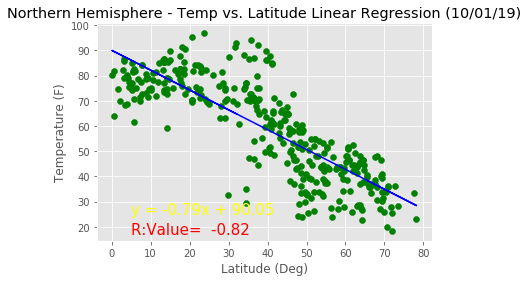

In [24]:
## Convert to floats for Latitiude and Temerature as x and y values
x_values = North_df['Latitude'].astype('float')
y_values = North_df['Temperature'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rvalue = "R:Value=" + "  " + str(round(rvalue, 2))

# Plot scatter plot
plt.scatter(x_values,y_values, color="green")

# Plot regression line
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(5, 25),fontsize=15,color="yellow")
plt.annotate(rvalue,(5,17),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude (Deg)')
plt.ylabel('Temperature (F)')
plt.title(f"Northern Hemisphere - Temp vs. Latitude Linear Regression {date}")

# Show plot
plt.show()

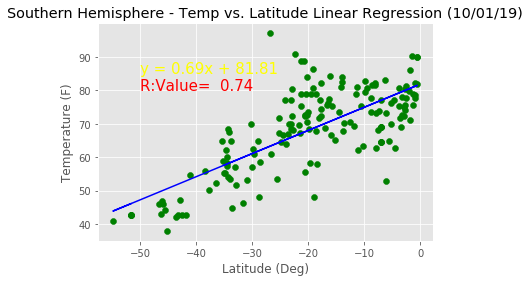

In [25]:
## Convert to floats for Latitiude and Temerature as x and y values
x_values = South_df['Latitude'].astype('float')
y_values = South_df['Temperature'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rvalue = "R:Value=" + "  " + str(round(rvalue, 2))

# Plot scatter plot
plt.scatter(x_values,y_values, color="green")

# Plot regression line
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(-50, 85),fontsize=15,color="yellow")
plt.annotate(rvalue,(-50, 80),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude (Deg)')
plt.ylabel('Temperature (F)')
plt.title(f"Southern Hemisphere - Temp vs. Latitude Linear Regression {date}")

# Show plot
plt.show()

In [26]:
# As expected, Tempatures decrease as you get further from the equator for the Northern Hemisphere.
# As expected, Tempatures increase as you get closer to the equator for the Northern Hemisphere.
# The R value of  .82 for the Northern Hemishere .74 for the Southern Hemisphere shows a moderate relationship 
# between the temperature and latitude.

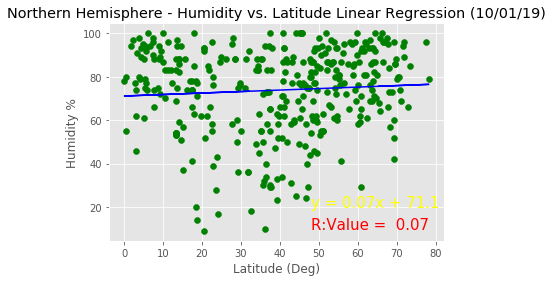

In [27]:
## Convert to floats for Latitiude and Temerature as x and y values
x_values = North_df['Latitude'].astype('float')
y_values = North_df['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rvalue = "R:Value =" + "  " + str(round(rvalue, 2))

# Plot scatter plot
plt.scatter(x_values,y_values, color="green")

# Plot regression line
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(48,20),fontsize=15,color="yellow")
plt.annotate(rvalue,(48, 10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude (Deg)')
plt.ylabel('Humidity %')
plt.title(f"Northern Hemisphere - Humidity vs. Latitude Linear Regression {date}")

# Show plot
plt.show()

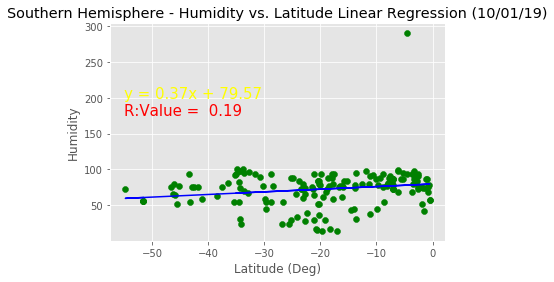

In [31]:
## Convert to floats for Latitiude and Temerature as x and y values
x_values = South_df['Latitude'].astype('float')
y_values = South_df['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rvalue = "R:Value =" + "  " + str(round(rvalue, 2))

# Plot scatter plot
plt.scatter(x_values,y_values, color="green")

# Plot regression line
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(-55,200),fontsize=15,color="yellow")
plt.annotate(rvalue,(-55, 175),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude (Deg)')
plt.ylabel('Humidity')
plt.title(f"Southern Hemisphere - Humidity vs. Latitude Linear Regression {date}")

# Show plot
plt.show()

In [32]:
# Humidity slightly increases the closer you get to the Equator for the
# Southern Hemisphere, and increaing insignificantly as you move north from the Equator. 
# The R value of .07 and .19 shows a low relationship between the humidity and latitude.

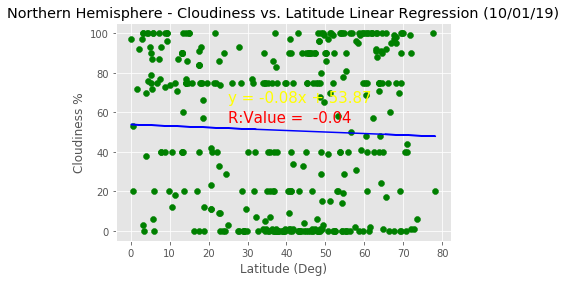

In [36]:
## Convert to floats for Latitiude and Temerature as x and y values
x_values = North_df['Latitude'].astype('float')
y_values = North_df['Clouds'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rvalue = "R:Value =" + "  " + str(round(rvalue, 2))

# Plot scatter plot
plt.scatter(x_values,y_values, color="green")

# Plot regression line
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(25,65),fontsize=15,color="yellow")
plt.annotate(rvalue,(25, 55),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude (Deg)')
plt.ylabel('Cloudiness %')
plt.title(f"Northern Hemisphere - Cloudiness vs. Latitude Linear Regression {date}")

# Show plot
plt.show()

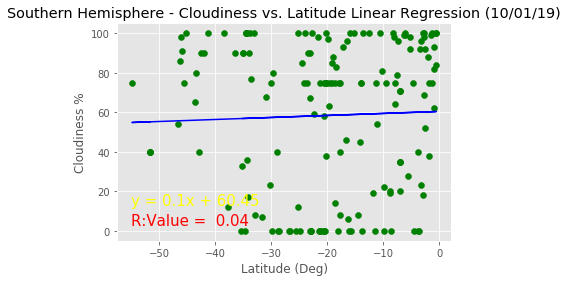

In [37]:
## Convert to floats for Latitiude and Temerature as x and y values
x_values = South_df['Latitude'].astype('float')
y_values = South_df['Clouds'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rvalue = "R:Value =" + "  " + str(round(rvalue, 2))

# Plot scatter plot
plt.scatter(x_values,y_values, color="green")

# Plot regression line
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(-55,13),fontsize=15,color="yellow")
plt.annotate(rvalue,(-55, 3),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude (Deg)')
plt.ylabel('Cloudiness %')
plt.title(f"Southern Hemisphere - Cloudiness vs. Latitude Linear Regression {date}")

# Show plot
plt.show()

In [38]:
# There seems to be just a slight increase in clouds for both  the Northern and slight increase in clouds 
# for the Southern Hemisphere as you get closer to the Equator.
# The R value of .04 for both hemispheres which shows no relationship between the cloudiness and latitude.  
# Its also shown by the wide dispertion of points in the graphs away from the regression line.

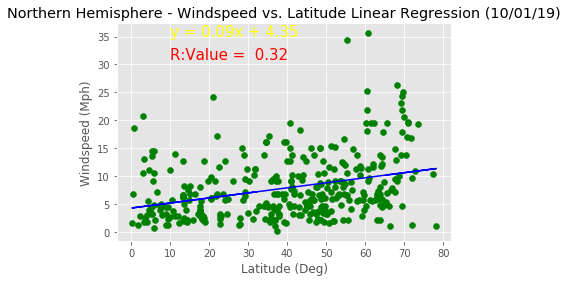

In [39]:
## Convert to floats for Latitiude and Temerature as x and y values
x_values = North_df['Latitude'].astype('float')
y_values = North_df['Windspeed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rvalue = "R:Value =" + "  " + str(round(rvalue, 2))

# Plot scatter plot
plt.scatter(x_values,y_values, color="green")

# Plot regression line
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(10,35),fontsize=15,color="yellow")
plt.annotate(rvalue,(10, 31),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude (Deg)')
plt.ylabel('Windspeed (Mph)')
plt.title(f"Northern Hemisphere - Windspeed vs. Latitude Linear Regression {date}")

# Show plot
plt.show()

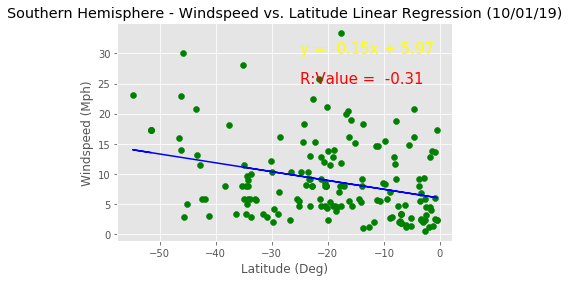

In [41]:
## Convert to floats for Latitiude and Temerature as x and y values
x_values = South_df['Latitude'].astype('float')
y_values = South_df['Windspeed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rvalue = "R:Value =" + "  " + str(round(rvalue, 2))

# Plot scatter plot
plt.scatter(x_values,y_values, color="green")

# Plot regression line
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(-25,30),fontsize=15,color="yellow")
plt.annotate(rvalue,(-25, 25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude (Deg)')
plt.ylabel('Windspeed (Mph)')
plt.title(f"Southern Hemisphere - Windspeed vs. Latitude Linear Regression {date}")

# Show plot
plt.show()

In [86]:
# For the Northern Hemisphere, windspeeds increase insignificantly as you get further from the Equator, 
# but windspeeds decrease at a slightly higher rate for the Southern Hemisphere as you near the Equator.
# The R Value of .32 and .31 respectively shows a low correlation between the two points, but for the 
# Norther Hemisphere the majority of cities experience winds of less than 10 miles an hour.  
# The windspeeds are much more scattered in the Southern Hemisphere.